In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import statsmodels.stats.diagnostic as diag
from sklearn.metrics import silhouette_samples, silhouette_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import GaussianNB
import sklearn.preprocessing
import random
import graphviz
from sklearn.svm import SVC
from sklearn.svm import SVR
## import pyclustertend 
import matplotlib.cm as cm
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 

Análisis de los datos

In [4]:
data = pd.read_csv('./train.csv', encoding = "latin1")
file = open('cuantitativas.txt', 'r')
quant= file.read().splitlines()
file = open('cualitativas.txt', 'r')
quali= file.read().splitlines()

FileNotFoundError: [Errno 2] No such file or directory: 'cuantitativas.txt'

In [ ]:
# Variables de interes
print('\033[36m' + 'Kurtosis: %f' % data['SalePrice'].kurt())
print('\033[36m' + 'Asimetría: %f' % data['SalePrice'].skew())
data['SalePrice'].describe()

Kurtosis: 6.536282
Asimetría: 1.882876


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
stat,p = stats.shapiro(data[["SalePrice"]].dropna())
print('Prueba de Kolmogorov-Smirnov:\np=%f\n'% p)
ks_statistic, p_value = diag.lilliefors(data[["SalePrice"]].dropna())
print('Prueba de Lilliefors:\nks=%f\np=%f'%(ks_statistic,p_value))

Prueba de Kolmogorov-Smirnov:
p=0.000000

Prueba de Lilliefors:
ks=0.123685
p=0.001000


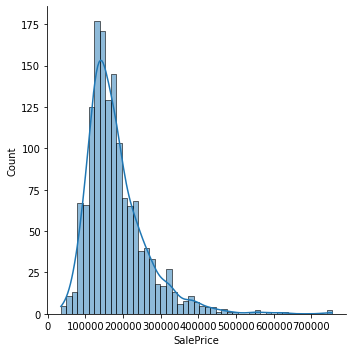

In [ ]:
sns.displot(data['SalePrice'], kde=True)

In [ ]:
data.fillna(0)
minPrice = data['SalePrice'].min()
maxPrice = data['SalePrice'].max()
divs = (maxPrice - minPrice) / 3
data['priceRange'] = data['LotArea']

data['priceRange'][data['SalePrice'] < minPrice + divs] = 0.0 #Economico
data['priceRange'][data['SalePrice'] >= minPrice + divs] = 1.0 #Precio medio
data['priceRange'][data['SalePrice'] >= minPrice + divs * 2] = 2.0 #Caro

C:\Users\juanp\AppData\Local\Temp\ipykernel_10092\618828850.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['priceRange'][data['SalePrice'] < minPrice + divs] = 0.0 #Economico
C:\Users\juanp\AppData\Local\Temp\ipykernel_10092\618828850.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['priceRange'][data['SalePrice'] >= minPrice + divs] = 1.0 #Precio medio
C:\Users\juanp\AppData\Local\Temp\ipykernel_10092\618828850.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [ ]:
Y = data['priceRange']
X = data.drop(['priceRange'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, train_size=0.7)

Preprocesamiento

Procesamiento de variables cuantitativas y cualitativas

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numeric_preprocessor = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")

preprocesador = ColumnTransformer([
    ('one_hot_encoder',categorical_preprocessor,quali),
    ('numerico', numeric_preprocessor,quant)
],remainder="passthrough")

Preprocesamiento + modelo en un paso

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn import set_config

modelo = make_pipeline(preprocesador, SVC(kernel="linear"))

set_config(display='diagram')
modelo

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Id', 'MSSubClass',
                                                   'MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'OverallQual',
                                                   'OverallCond...
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageCars', 'GarageArea',
                                                   'WoodDeckSF', 'OpenPorchSF',
                                                   'EnclosedPorch', '3SsnPorch',
                                                   'ScreenPorch', 'PoolArea',
                                                   'MiscVal', 'SalePrice'])])),
                ('svc', SVC(kernel='linear'))])

Entrenamiento de modelo

In [ ]:
_=modelo.fit(X_train,y_train)

In [ ]:
modelo.score(X_test,y_test)

0.9680365296803652

In [ ]:
target_pred = modelo.predict(X_test)
print(target_pred)
print ("Accuracy:",metrics.accuracy_score(y_test, target_pred))
print ("Precision:", metrics.precision_score(y_test,target_pred,average='weighted') )
print ("Recall: ", metrics.recall_score(y_test,target_pred,average='weighted'))


[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy: 0.9680365296803652
Precision: 0.9720595728851714
Recall:  0.9680365296803652


In [ ]:
from sklearn.metrics import  confusion_matrix
confusion_matrix(target_pred, y_test)

array([[380,   2,   0],
       [  9,  43,   1],
       [  0,   2,   1]], dtype=int64)